# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# 2) Loading Dataset

In [2]:
bank_data = pd.read_csv('bank-additional-full.csv', sep = ';')
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank_data.shape

(41188, 21)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(bank_data['job'].unique())
print(bank_data['marital'].unique())
print(bank_data['education'].unique())
print(bank_data['default'].unique())
print(bank_data['month'].unique())
print(bank_data['day_of_week'].unique())
print(bank_data['contact'].unique())
print(bank_data['housing'].unique())
print(bank_data['loan'].unique())
print(bank_data['poutcome'].unique())
print(bank_data['previous'].unique())
print(bank_data['pdays'].unique())
print(bank_data['y'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['telephone' 'cellular']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['nonexistent' 'failure' 'success']
[0 1 2 3 4 5 6 7]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
['no' 'yes']


# 3) Preprocessing of Dataset

In [6]:
bank_data.rename(columns = {'default':'Default Credit', 'housing': 'Housing Loan', 'loan': 'Personal Loan', 'contact':'Mode of Contact',
                            'month':'Contact Month', 'day_of_week':'Contact Day', 'duration':'Contact Duration','pdays':'Passed_Days',
                           ' previous':'Performed_Contacts', 'poutcome':'Outcome_of_Campaign','nr.employed':'No._Of_Employees','y':'Term Deposit'}, inplace=True)
bank_data.head(10)

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Mode of Contact,Contact Month,Contact Day,...,campaign,Passed_Days,previous,Outcome_of_Campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,No._Of_Employees,Term Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_data.replace({'unknown': 'NaN'}, inplace=True)
bank_data.replace(['nonexistent', 'failure', 'success'], [0, 1, 2], inplace=True)
bank_data.replace(['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
bank_data

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Mode of Contact,Contact Month,Contact Day,...,campaign,Passed_Days,previous,Outcome_of_Campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,No._Of_Employees,Term Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
bank_data.replace({'basic.4y':'Basic+4yr', 'high.school':'High_School', 'basic.6y':'Basic+6yr', 'basic.9y':'Basic+9yr',
                   'professional.course':'Professional Course','university.degree':'University Degree','illiterate': 'Illiterate'}, inplace=True)
bank_data

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Mode of Contact,Contact Month,Contact Day,...,campaign,Passed_Days,previous,Outcome_of_Campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,No._Of_Employees,Term Deposit
0,56,housemaid,married,Basic+4yr,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,High_School,NaN,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High_School,no,yes,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic+6yr,no,no,no,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High_School,no,no,yes,telephone,5,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,Professional Course,no,yes,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,Professional Course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,University Degree,no,yes,no,cellular,11,fri,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,Professional Course,no,no,no,cellular,11,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


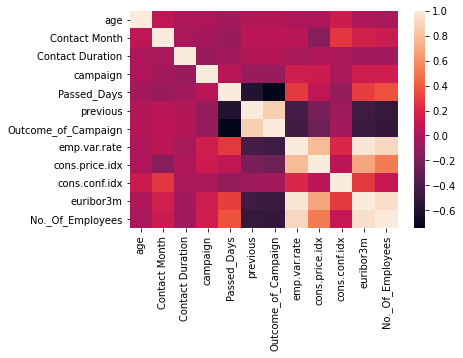

In [9]:
sns.heatmap(bank_data.corr())

In [10]:
bank_data.isnull().sum()

age                    0
job                    0
marital                0
education              0
Default Credit         0
Housing Loan           0
Personal Loan          0
Mode of Contact        0
Contact Month          0
Contact Day            0
Contact Duration       0
campaign               0
Passed_Days            0
previous               0
Outcome_of_Campaign    0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
No._Of_Employees       0
Term Deposit           0
dtype: int64

In [11]:
default = bank_data['Default Credit'].values
house_loan = bank_data['Housing Loan'].values
personal_loan = bank_data['Personal Loan'].values
term_deposit = bank_data['Term Deposit'].values

In [12]:
bank_data_df = pd.DataFrame(bank_data)

In [13]:
bank_data_df.drop(['Mode of Contact','emp.var.rate','euribor3m','cons.price.idx','cons.conf.idx'], axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
default = labelencoder.fit_transform(bank_data_df['Default Credit'])
house_loan = labelencoder.fit_transform(bank_data_df['Housing Loan'])
personal_loan = labelencoder.fit_transform(bank_data_df['Personal Loan'])
term_deposit = labelencoder.fit_transform(bank_data_df['Term Deposit'])
onehotencoder=OneHotEncoder()

In [15]:
print(default)
print(house_loan)
print(personal_loan)
print(term_deposit)

[1 0 1 ... 1 1 1]
[1 1 2 ... 2 1 2]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 1 0]


In [16]:
print(bank_data.head(25))

    age          job   marital            education Default Credit  \
0    56    housemaid   married            Basic+4yr             no   
1    57     services   married          High_School            NaN   
2    37     services   married          High_School             no   
3    40       admin.   married            Basic+6yr             no   
4    56     services   married          High_School             no   
5    45     services   married            Basic+9yr            NaN   
6    59       admin.   married  Professional Course             no   
7    41  blue-collar   married                  NaN            NaN   
8    24   technician    single  Professional Course             no   
9    25     services    single          High_School             no   
10   41  blue-collar   married                  NaN            NaN   
11   25     services    single          High_School             no   
12   29  blue-collar    single          High_School             no   
13   57    housemaid

In [17]:
bank_data_df['Default Credit'] = default
bank_data_df['Housing Loan'] = house_loan 
bank_data_df['Personal Loan'] = personal_loan
bank_data_df['Term Deposit'] = term_deposit

In [18]:
bank_data_df.head(25)

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Day,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
0,56,housemaid,married,Basic+4yr,1,1,1,5,mon,261,1,999,0,0,5191.0,0
1,57,services,married,High_School,0,1,1,5,mon,149,1,999,0,0,5191.0,0
2,37,services,married,High_School,1,2,1,5,mon,226,1,999,0,0,5191.0,0
3,40,admin.,married,Basic+6yr,1,1,1,5,mon,151,1,999,0,0,5191.0,0
4,56,services,married,High_School,1,1,2,5,mon,307,1,999,0,0,5191.0,0
5,45,services,married,Basic+9yr,0,1,1,5,mon,198,1,999,0,0,5191.0,0
6,59,admin.,married,Professional Course,1,1,1,5,mon,139,1,999,0,0,5191.0,0
7,41,blue-collar,married,NaN,0,1,1,5,mon,217,1,999,0,0,5191.0,0
8,24,technician,single,Professional Course,1,2,1,5,mon,380,1,999,0,0,5191.0,0
9,25,services,single,High_School,1,2,1,5,mon,50,1,999,0,0,5191.0,0


In [19]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   Default Credit       41188 non-null  int32  
 5   Housing Loan         41188 non-null  int32  
 6   Personal Loan        41188 non-null  int32  
 7   Contact Month        41188 non-null  int64  
 8   Contact Day          41188 non-null  object 
 9   Contact Duration     41188 non-null  int64  
 10  campaign             41188 non-null  int64  
 11  Passed_Days          41188 non-null  int64  
 12  previous             41188 non-null  int64  
 13  Outcome_of_Campaign  41188 non-null  int64  
 14  No._Of_Employees     41188 non-null  float64
 15  Term Deposit         41188 non-null 

# 4) Visualization

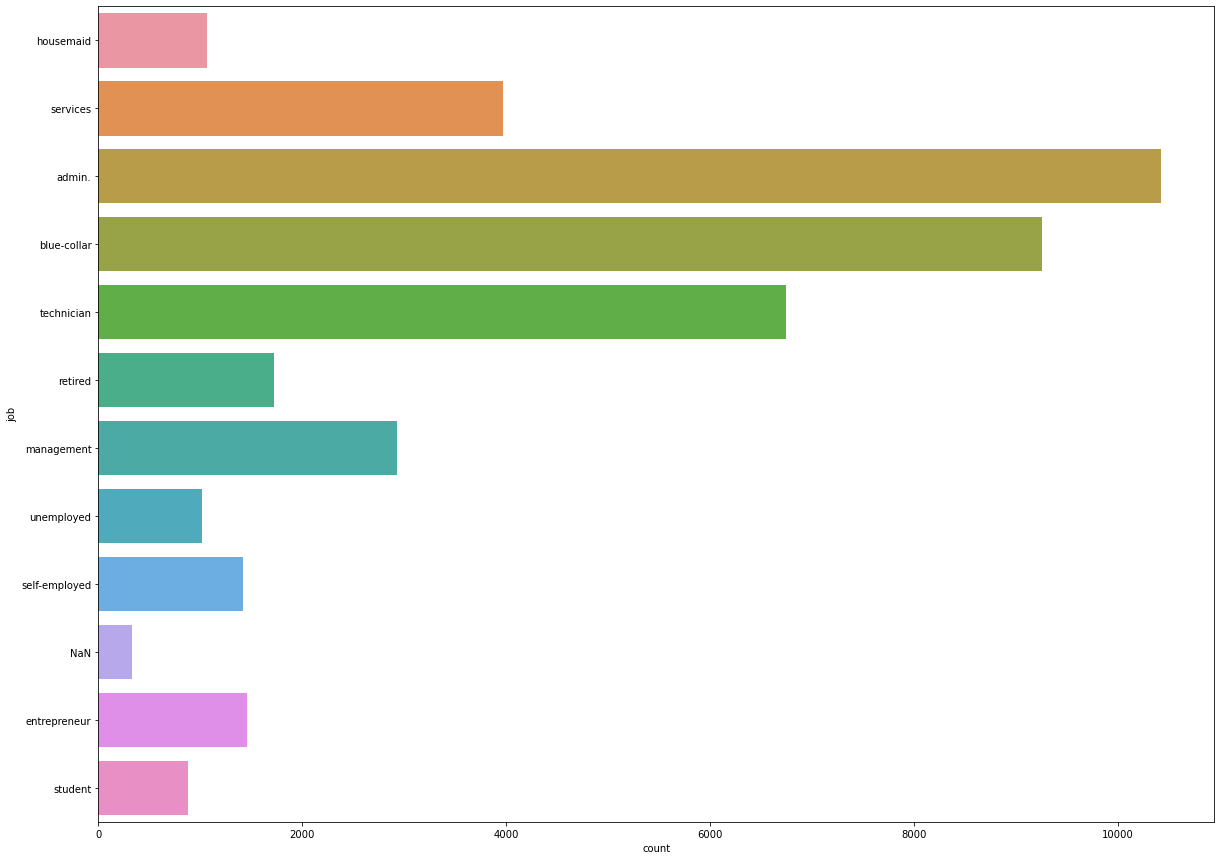

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(y='job', data=bank_data_df)

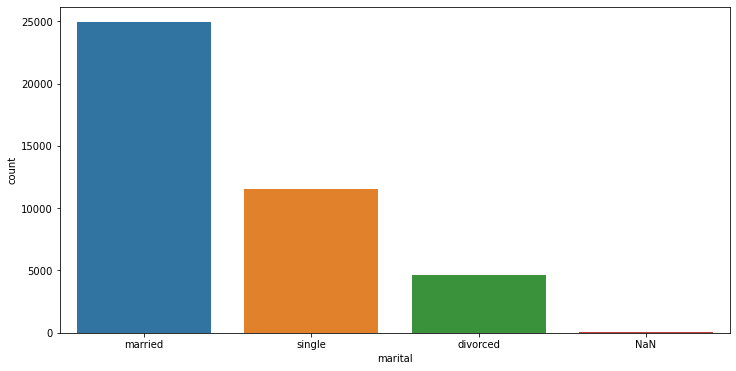

In [21]:
plt.figure(figsize=(12,6))
sns.countplot('marital', data=bank_data)

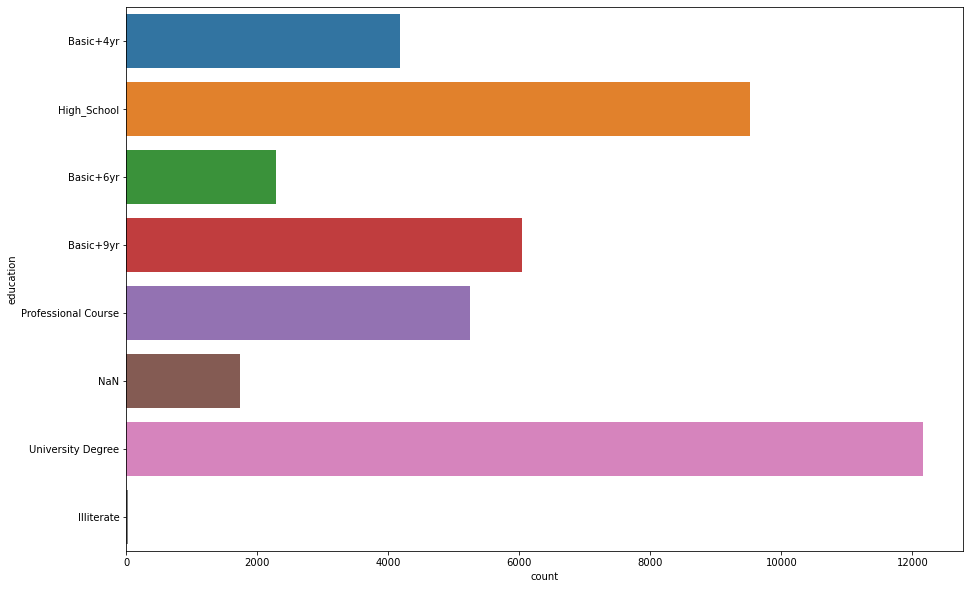

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(y='education', data=bank_data)

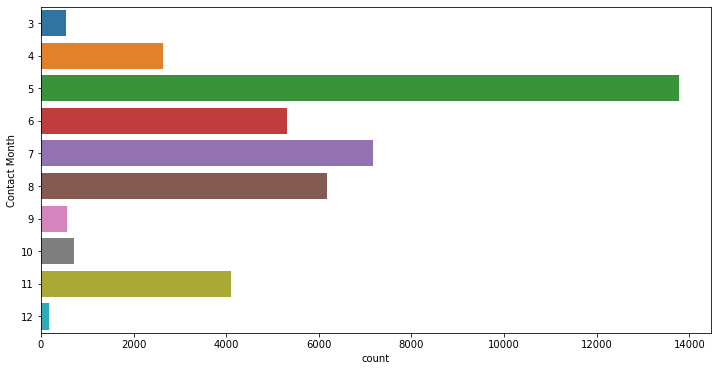

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(y='Contact Month', data=bank_data)

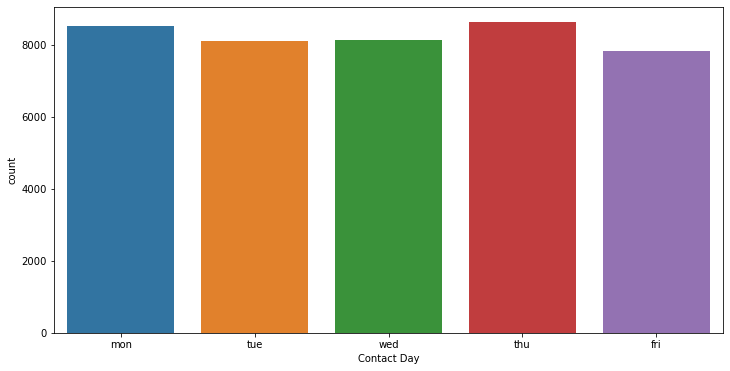

In [24]:
plt.figure(figsize=(12,6))
sns.countplot('Contact Day', data=bank_data)

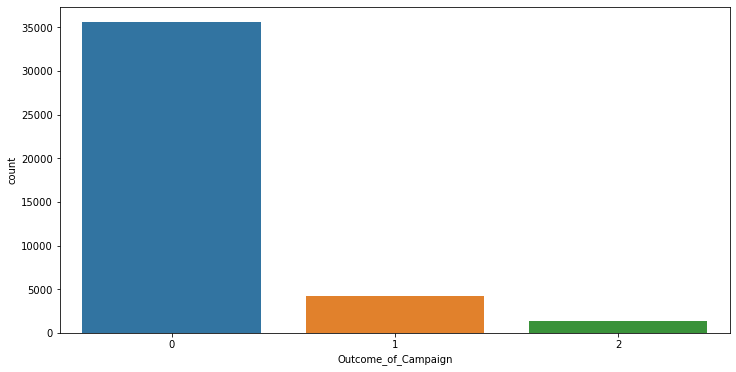

In [25]:
plt.figure(figsize=(12,6))
sns.countplot('Outcome_of_Campaign', data=bank_data)

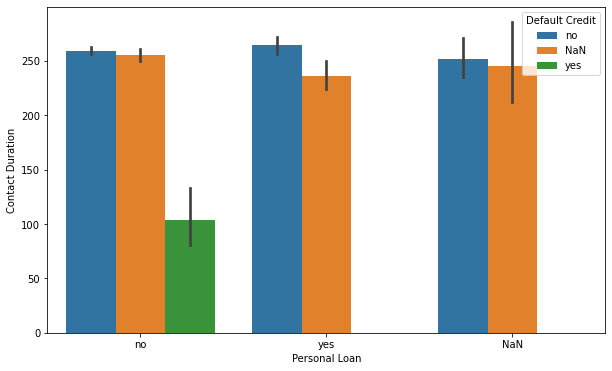

In [26]:
plt.figure(figsize=(10,6))
sns.barplot('Personal Loan', 'Contact Duration', hue='Default Credit', data=bank_data)

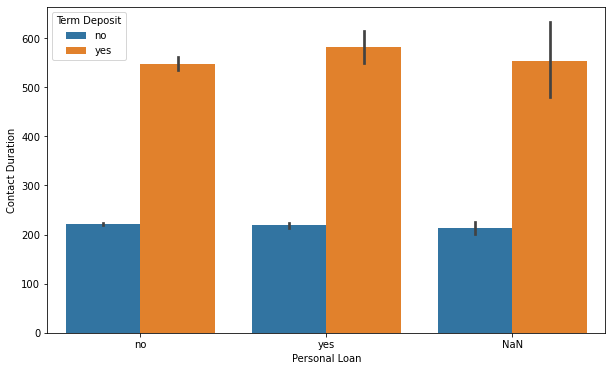

In [27]:
plt.figure(figsize=(10,6))
sns.barplot('Personal Loan', 'Contact Duration', hue='Term Deposit', data=bank_data)

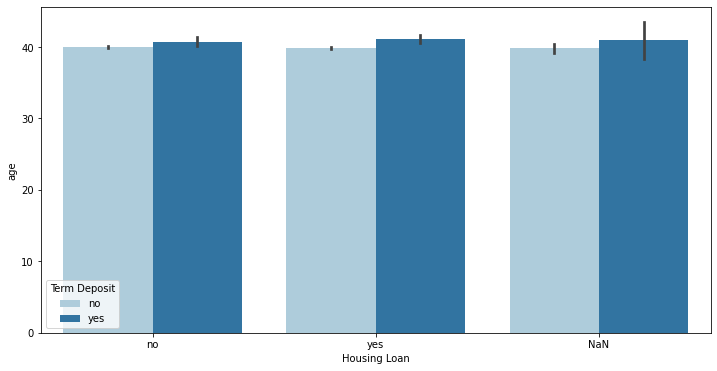

In [28]:
plt.figure(figsize=(12,6))
sns.barplot('Housing Loan', 'age', hue='Term Deposit', palette="Paired", data=bank_data)

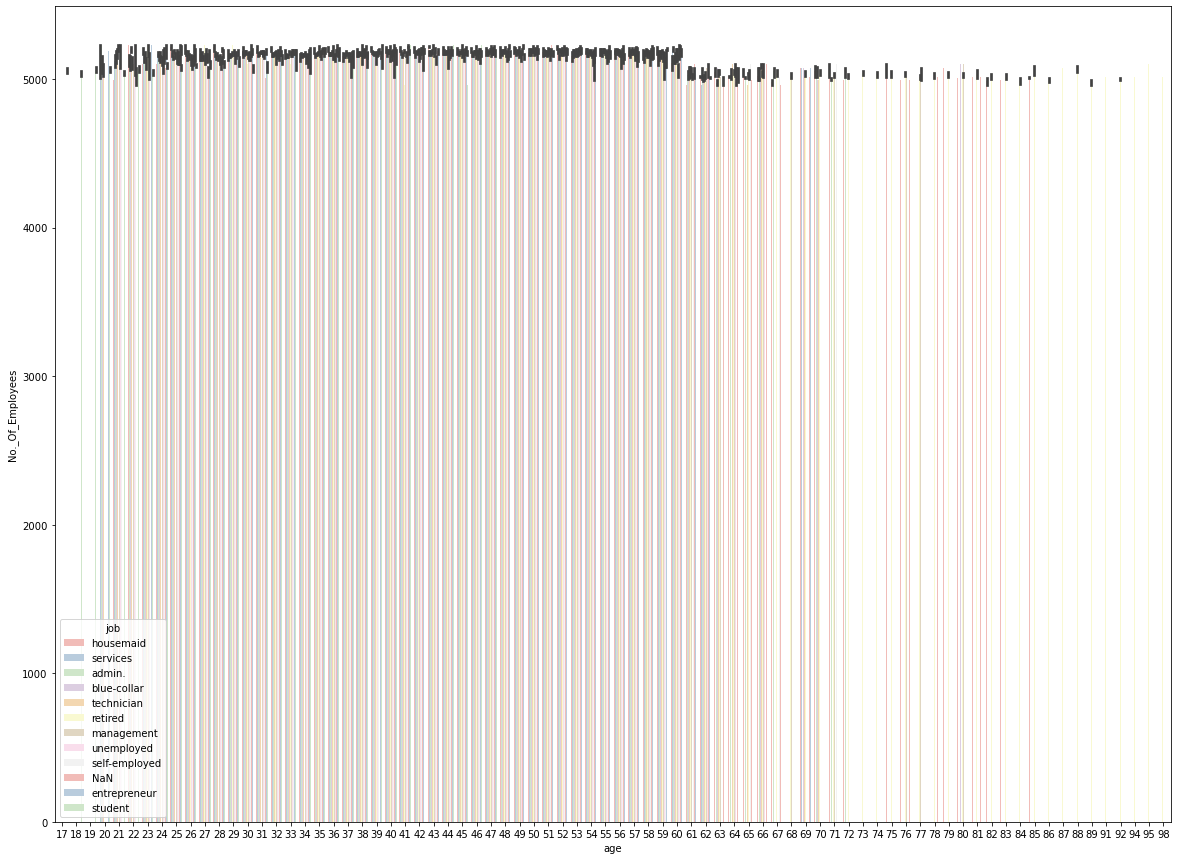

In [29]:
plt.figure(figsize=(20,15))
sns.barplot('age', 'No._Of_Employees', hue='job', palette="Pastel1", data=bank_data)

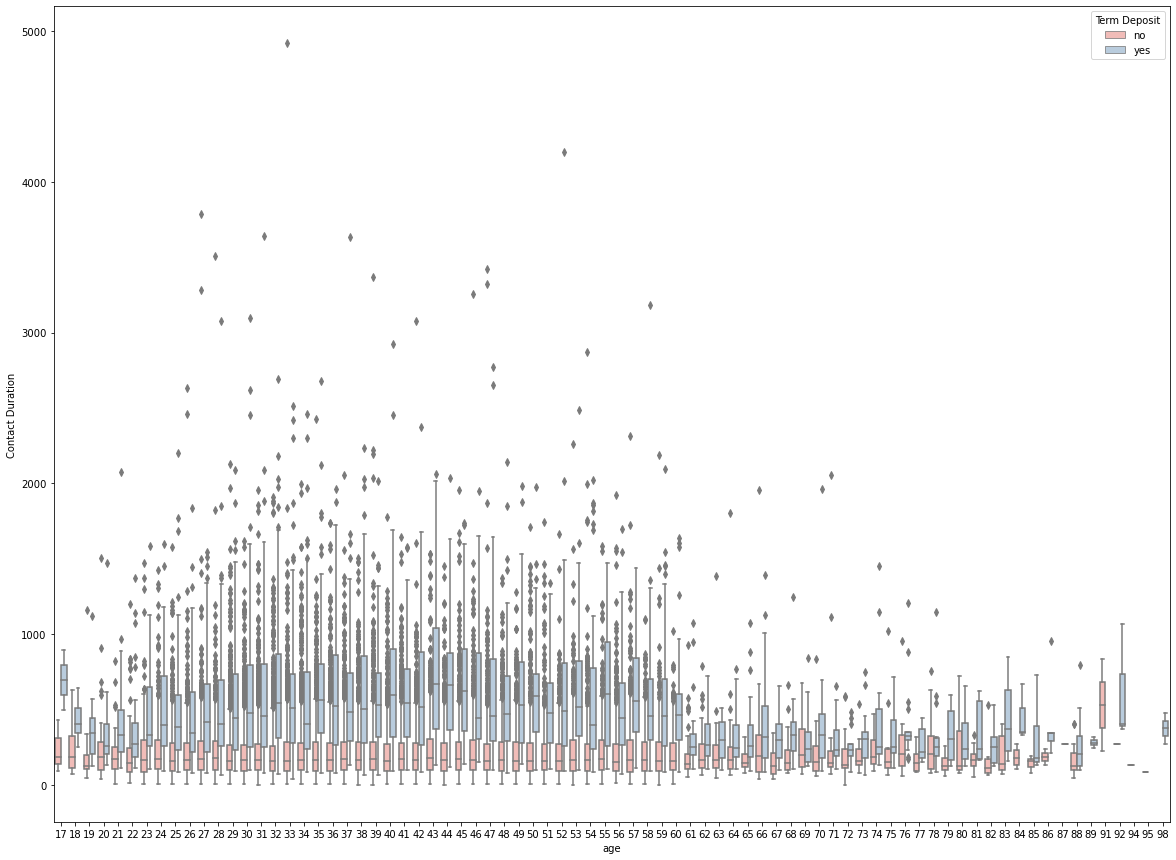

In [30]:
plt.figure(figsize=(20,15))
sns.boxplot('age', 'Contact Duration', hue='Term Deposit', palette="Pastel1", data=bank_data)

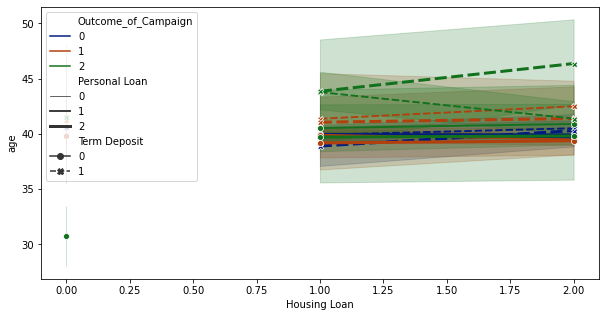

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot('Housing Loan', 'age', hue='Outcome_of_Campaign', size='Personal Loan', style='Term Deposit', data=bank_data_df, palette="dark", markers=True )

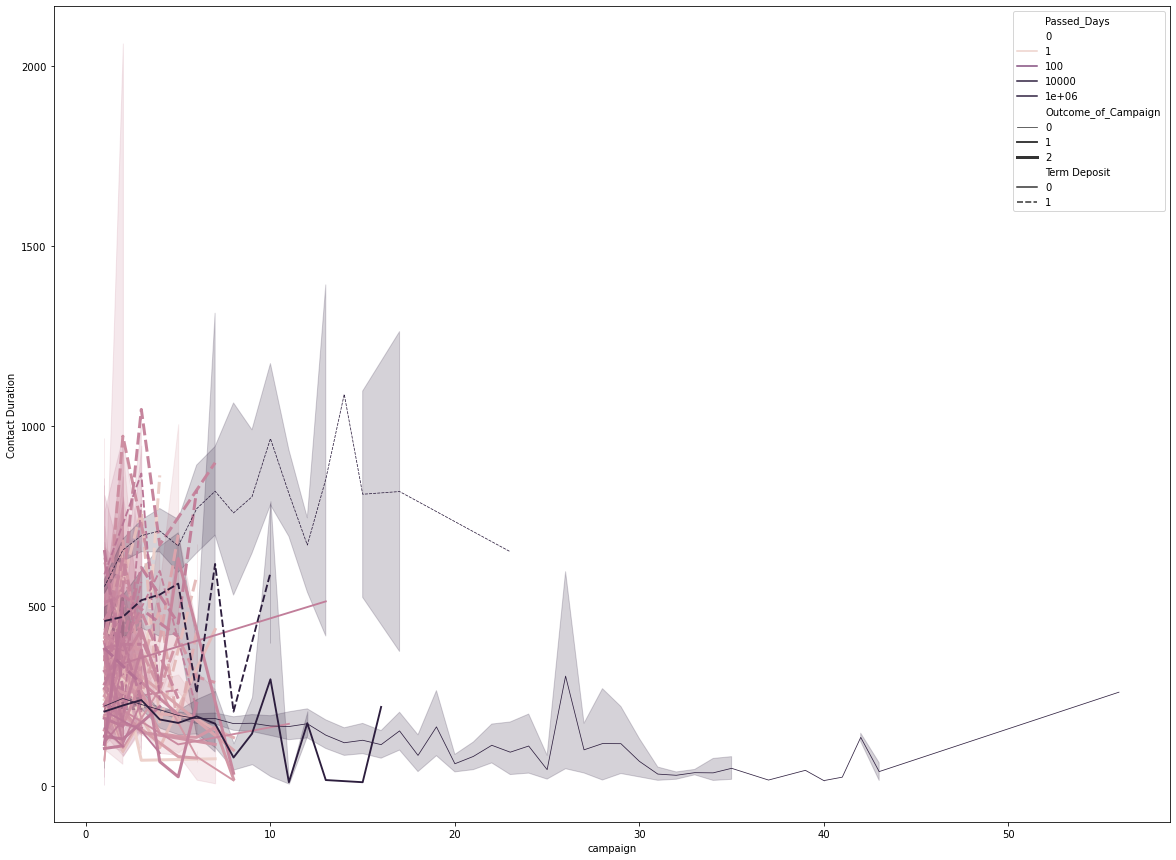

In [32]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(20,15))
sns.lineplot('campaign', 'Contact Duration', hue='Passed_Days',size='Outcome_of_Campaign', style='Term Deposit',hue_norm=LogNorm(), data=bank_data_df)

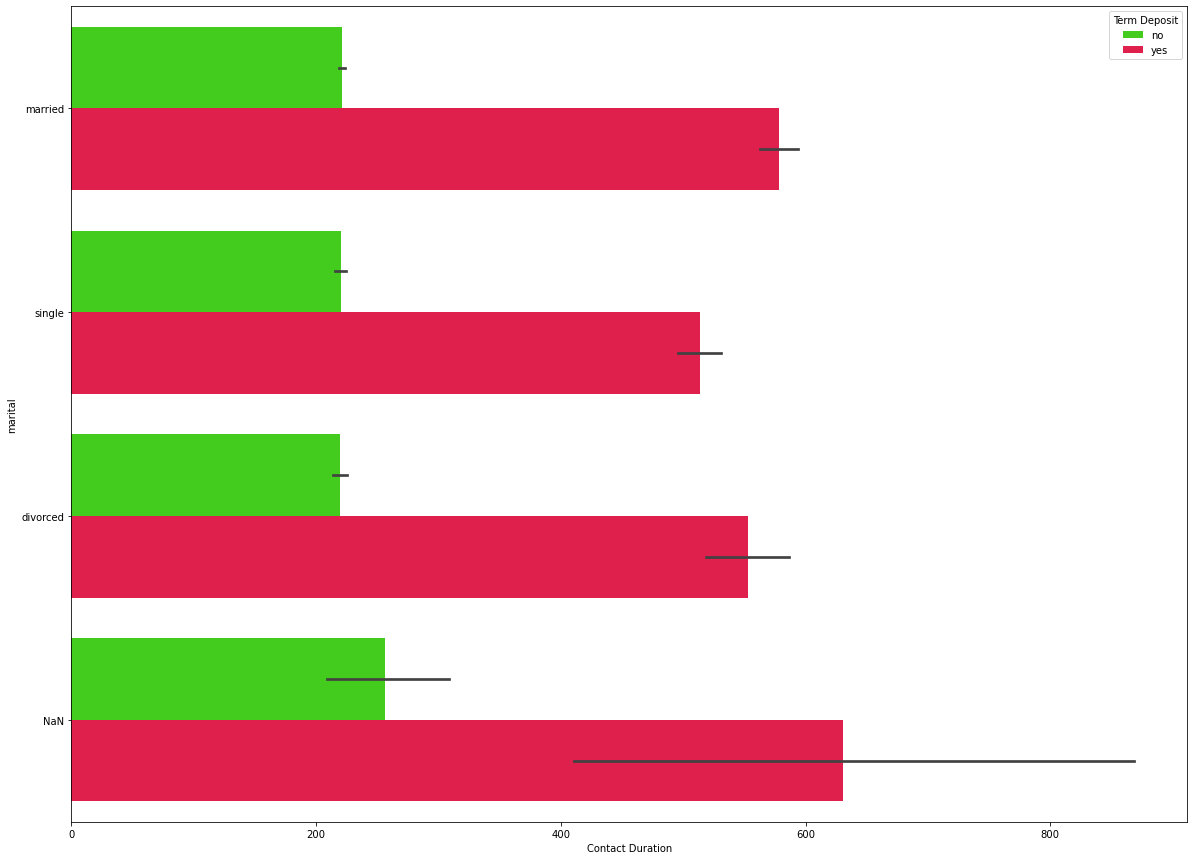

In [33]:
plt.figure(figsize=(20,15))
sns.barplot('Contact Duration', 'marital', hue='Term Deposit', palette="prism", data=bank_data)

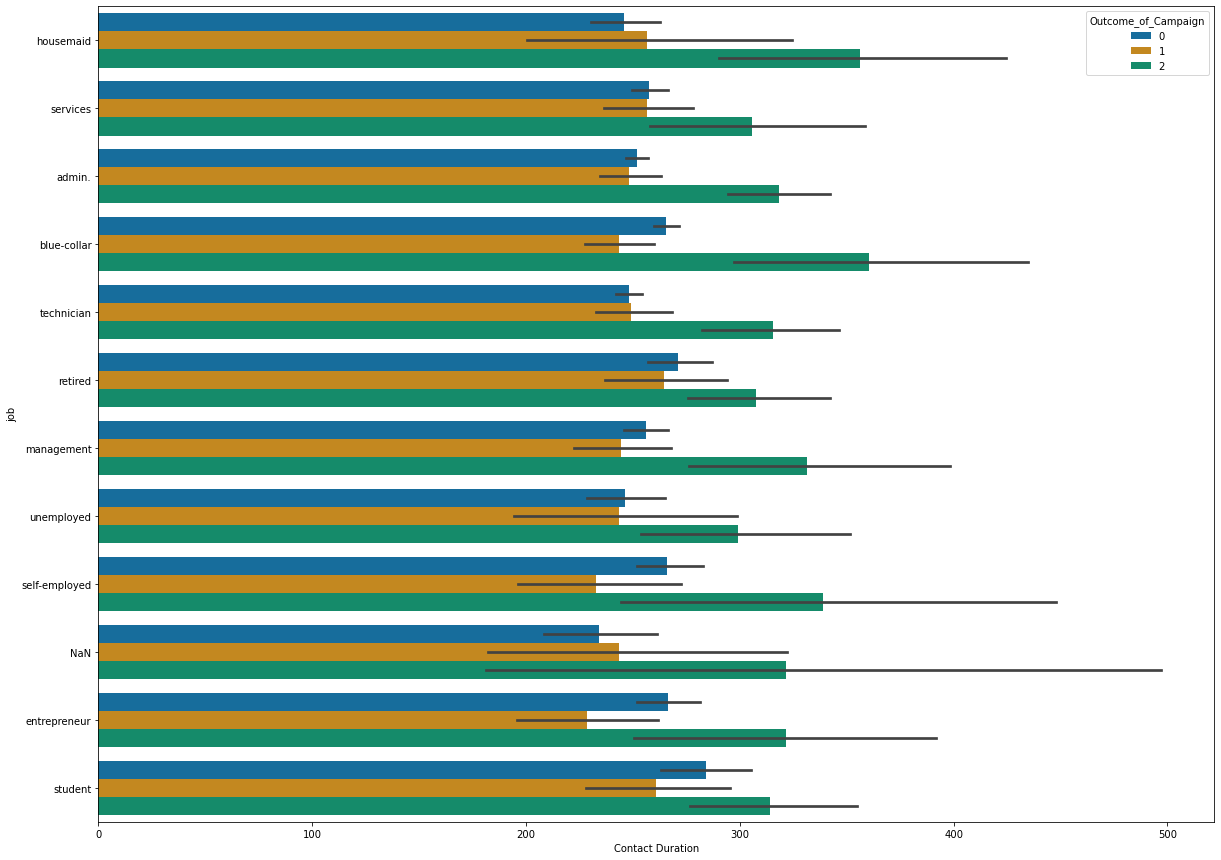

In [34]:
plt.figure(figsize=(20,15))
sns.barplot('Contact Duration', 'job', hue='Outcome_of_Campaign', palette="colorblind", data=bank_data)

<Figure size 1440x1080 with 0 Axes>

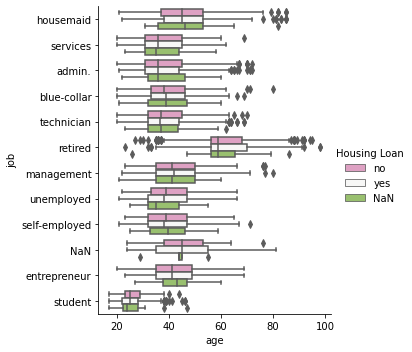

In [35]:
plt.figure(figsize=(20,15))
sns.catplot('age', 'job', hue='Housing Loan', palette="PiYG", data=bank_data, kind='box')

In [36]:
#bank_data_df.info()

In [37]:
#import os

In [38]:
#%pwd

In [39]:
#bank_data.to_csv('Bank Data.csv')

In [40]:
# month = bank_data_df.sort_values(by='Contact Month', ascending=True, inplace=True)
# day = bank_data_df.sort_values(by='Contact Day', ascending=True, inplace=True)
duration = bank_data_df.sort_values(by='Contact Duration', ascending=True, inplace=True)
#bank_data_df

In [41]:
bank_data_df.groupby(['age','job','Default Credit', 'marital', 'Housing Loan','Personal Loan','Contact Month','Contact Duration','Passed_Days','campaign','Outcome_of_Campaign','No._Of_Employees','Term Deposit']).age.count()
bank_data_df

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Day,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
33015,31,blue-collar,married,Basic+9yr,1,1,1,5,mon,0,2,999,0,0,5099.1,0
23031,59,management,married,University Degree,1,2,1,8,tue,0,10,999,0,0,5228.1,0
28063,53,blue-collar,divorced,High_School,1,2,1,4,fri,0,3,999,0,0,5099.1,0
6251,39,admin.,married,High_School,1,2,1,5,tue,0,4,999,0,0,5191.0,0
28239,44,blue-collar,married,Basic+9yr,1,1,1,4,tue,1,1,999,0,0,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,37,unemployed,married,Professional Course,1,2,1,5,fri,3631,2,999,0,0,5191.0,1
13820,31,technician,married,Professional Course,1,1,1,7,thu,3643,1,999,0,0,5228.1,1
40537,27,admin.,single,High_School,1,1,1,8,fri,3785,1,999,0,0,4991.6,0
22192,52,blue-collar,married,Basic+4yr,1,1,1,8,thu,4199,3,999,0,0,5228.1,1


# Converting to numeric data type

In [42]:
bank_data_df.replace({'NaN': 0}, inplace=True)

In [43]:
bank_data_df.drop(['Contact Day'], axis=1, inplace=True)

In [44]:
bank_data_df['job']= pd.to_numeric(bank_data_df['job'], errors='coerce')
bank_data_df['marital']= pd.to_numeric(bank_data_df['marital'], errors='coerce')
bank_data_df['education']= pd.to_numeric(bank_data_df['education'], errors='coerce')
bank_data_df['No._Of_Employees'] = bank_data_df['No._Of_Employees'].astype(int)
bank_data_df['Outcome_of_Campaign']= pd.to_numeric(bank_data_df['Outcome_of_Campaign'], errors='coerce')

In [45]:
bank_data_df['marital'].unique

<bound method Series.unique of 33015   NaN
23031   NaN
28063   NaN
6251    NaN
28239   NaN
         ..
7727    NaN
13820   NaN
40537   NaN
22192   NaN
24091   NaN
Name: marital, Length: 41188, dtype: float64>

In [46]:
bank_data_df.head()

,age,job,marital,education,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
33015,31,NaN,NaN,NaN,1,1,1,5,0,2,999,0,0,5099,0
23031,59,NaN,NaN,NaN,1,2,1,8,0,10,999,0,0,5228,0
28063,53,NaN,NaN,NaN,1,2,1,4,0,3,999,0,0,5099,0
6251,39,NaN,NaN,NaN,1,2,1,5,0,4,999,0,0,5191,0
28239,44,NaN,NaN,NaN,1,1,1,4,1,1,999,0,0,5099,0


In [47]:
bank_data_df.info()
#bank_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 33015 to 24091
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  330 non-null    float64
 2   marital              80 non-null     float64
 3   education            1731 non-null   float64
 4   Default Credit       41188 non-null  int32  
 5   Housing Loan         41188 non-null  int32  
 6   Personal Loan        41188 non-null  int32  
 7   Contact Month        41188 non-null  int64  
 8   Contact Duration     41188 non-null  int64  
 9   campaign             41188 non-null  int64  
 10  Passed_Days          41188 non-null  int64  
 11  previous             41188 non-null  int64  
 12  Outcome_of_Campaign  41188 non-null  int64  
 13  No._Of_Employees     41188 non-null  int32  
 14  Term Deposit         41188 non-null  int32  
dtypes: float64(3), int32(5), int64(7

In [48]:
bank_data_df['education'].isnull().sum()

39457

In [49]:
bank_data_df.drop(['job', 'marital', 'education'], axis=1, inplace=True)

In [50]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 33015 to 24091
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  41188 non-null  int64
 1   Default Credit       41188 non-null  int32
 2   Housing Loan         41188 non-null  int32
 3   Personal Loan        41188 non-null  int32
 4   Contact Month        41188 non-null  int64
 5   Contact Duration     41188 non-null  int64
 6   campaign             41188 non-null  int64
 7   Passed_Days          41188 non-null  int64
 8   previous             41188 non-null  int64
 9   Outcome_of_Campaign  41188 non-null  int64
 10  No._Of_Employees     41188 non-null  int32
 11  Term Deposit         41188 non-null  int32
dtypes: int32(5), int64(7)
memory usage: 3.3 MB


In [51]:
bank_data_df.describe()

,age,Default Credit,Housing Loan,Personal Loan,Contact Month,Contact Duration,campaign,Passed_Days,previous,Outcome_of_Campaign,No._Of_Employees,Term Deposit
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.791347,1.499806,1.127659,6.607896,258.285010,2.567593,962.475454,0.172963,0.169904,5166.849446,0.112654
std,10.42125,0.406530,0.545967,0.399297,2.040998,259.279249,2.770014,186.910907,0.494901,0.455754,72.328375,0.316173
min,17.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4963.000000,0.000000
25%,32.00000,1.000000,1.000000,1.000000,5.000000,102.000000,1.000000,999.000000,0.000000,0.000000,5099.000000,0.000000
50%,38.00000,1.000000,2.000000,1.000000,6.000000,180.000000,2.000000,999.000000,0.000000,0.000000,5191.000000,0.000000
75%,47.00000,1.000000,2.000000,1.000000,8.000000,319.000000,3.000000,999.000000,0.000000,0.000000,5228.000000,0.000000
max,98.00000,2.000000,2.000000,2.000000,12.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,5228.000000,1.000000


# 5) Data Spliting

In [52]:
x = bank_data_df.drop(['Term Deposit'], axis=1)
y = bank_data_df['Term Deposit'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=32)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35009, 11)
(6179, 11)
(35009,)
(6179,)


# 6) Model Training and prediction

In [55]:
from sklearn.linear_model import LogisticRegression
lo_reg = LogisticRegression()
lo_reg.fit(X_train,y_train)

c:\users\shree\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [56]:
pred = lo_reg.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
pred.shape

(6179,)

In [58]:
score=lo_reg.score(X_test, y_test)
print(score)

0.9033824243405082


Text(0.5, 1.0, 'Accuracy Score: 0.9033824243405082')

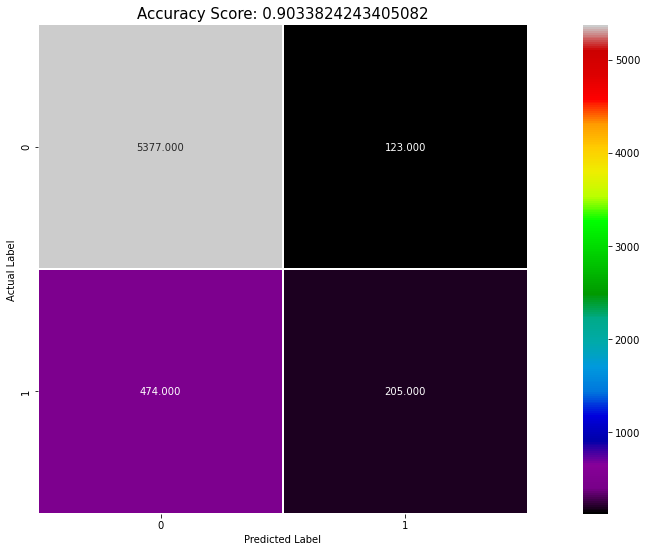

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
# print(cm)
plt.figure(figsize=(20,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='nipy_spectral')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title=f"Accuracy Score: {score}"
plt.title(all_sample_title, size=15)

In [60]:
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Precision: 0.625
Recall: 0.3019145802650957
